In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
import joblib

In [3]:
df = pd.read_csv("diabetic_data.csv")

In [4]:
df.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
df.replace("?", pd.NA, inplace=True)

In [6]:
df.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),<NA>,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),<NA>,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),<NA>,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),<NA>,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),<NA>,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
pd.set_option("display.max_columns", None)
df.describe(include='all')

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,1.017660e+05,1.017660e+05,99493,101766,101766,3197,101766.000000,101766.000000,101766.000000,101766.000000,61510,51817,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101745,101408,100343,101766.000000,5346,17018,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,NaN,NaN,5,3,10,9,NaN,NaN,NaN,NaN,17,72,NaN,NaN,NaN,NaN,NaN,NaN,716,748,789,NaN,3,3,4,4,4,4,4,2,4,4,2,4,4,4,4,2,3,1,1,4,4,2,2,2,2,2,2,3
top,NaN,NaN,Caucasian,Female,[70-80),[75-100),NaN,NaN,NaN,NaN,MC,InternalMedicine,NaN,NaN,NaN,NaN,NaN,NaN,428,276,250,NaN,Norm,>8,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
freq,NaN,NaN,76099,54708,26068,1336,NaN,NaN,NaN,NaN,32439,14635,NaN,NaN,NaN,NaN,NaN,NaN,6862,6752,11555,NaN,2597,8216,81778,100227,101063,101680,96575,101765,89080,91116,101743,94438,95401,101458,101728,101763,101727,101766,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864
mean,1.652016e+08,5.433040e+07,NaN,NaN,NaN,NaN,2.024006,3.715642,5.754437,4.395987,NaN,NaN,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,NaN,NaN,NaN,7.422607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.026403e+08,3.869636e+07,NaN,NaN,NaN,NaN,1.445403,5.280166,4.064081,2.985108,NaN,NaN,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,NaN,NaN,NaN,1.933600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.252200e+04,1.350000e+02,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,8.496119e+07,2.341322e+07,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,2.000000,NaN,NaN,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.523890e+08,4.550514e+07,NaN,NaN,NaN,NaN,1.000000,1.000000,7.000000,4.000000,NaN,NaN,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.302709e+08,8.754595e+07,NaN,NaN,NaN,NaN,3.000000,4.000000,7.000000,6.000000,NaN,NaN,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
sum(df["diag_1"].astype(str).str.len().lt(3))

2646

In [9]:
sum(df["diag_1"] == "8")

515

In [21]:
columns_to_drop = ['weight',
'admission_type_id',
'discharge_disposition_id',
'admission_source_id',
'payer_code',
'medical_specialty',
'number_outpatient',
'number_emergency',
'number_inpatient',
'max_glu_serum',
'A1Cresult',
'metformin',
'repaglinide', 	
'nateglinide',	
'chlorpropamide', 	
'glimepiride', 	
'acetohexamide',	
'glipizide', 
'glyburide', 	
'tolbutamide',
'pioglitazone',
'rosiglitazone',
'acarbose',
'miglitol',
'troglitazone',
'tolazamide',
'examide',
'citoglipton',
'insulin',
'glyburide-metformin',
'glipizide-metformin',
'glimepiride-pioglitazone', 	
'metformin-rosiglitazone', 	
'metformin-pioglitazone']

In [17]:
df_prelim_cull = df.drop(columns_to_drop, axis = 1)

This initial culling of features was firstly done to drop characteristics that are outside of this projects scope. That is because this project is focusing on diagnostic comorbidities and is not concerned with how specific medications effect readmission rates. Secondly it was done to remove data on how many times a patient was seen in outpatient, emergency, of inpatient settings in the last year as this is also outside the scope of the project. Finally weight was dropped as it was missing well of 90% of it's entries, making it effectively unusable.
-
Considered for optional future readdition if model underperforms:
-
['number_outpatient',
'number_emergency',
'number_inpatient']
-
['max_glu_serum',
'A1Cresult']
-

In [18]:
df_prelim_cull.head(5)

,encounter_id,patient_nbr,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),1,41,0,1,250.83,<NA>,<NA>,1,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),3,59,0,18,276,250.01,255,9,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),2,11,5,13,648,250,V27,6,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),2,44,1,16,8,250.43,403,7,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,51,0,8,197,157,250,5,Ch,Yes,NO


In [19]:
df_prelim_cull.describe(include='all')

,encounter_id,patient_nbr,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses,change,diabetesMed,readmitted
count,1.017660e+05,1.017660e+05,99493,101766,101766,101766.000000,101766.000000,101766.000000,101766.000000,101745,101408,100343,101766.000000,101766,101766,101766
unique,NaN,NaN,5,3,10,NaN,NaN,NaN,NaN,716,748,789,NaN,2,2,3
top,NaN,NaN,Caucasian,Female,[70-80),NaN,NaN,NaN,NaN,428,276,250,NaN,No,Yes,NO
freq,NaN,NaN,76099,54708,26068,NaN,NaN,NaN,NaN,6862,6752,11555,NaN,54755,78363,54864
mean,1.652016e+08,5.433040e+07,NaN,NaN,NaN,4.395987,43.095641,1.339730,16.021844,NaN,NaN,NaN,7.422607,NaN,NaN,NaN
std,1.026403e+08,3.869636e+07,NaN,NaN,NaN,2.985108,19.674362,1.705807,8.127566,NaN,NaN,NaN,1.933600,NaN,NaN,NaN
min,1.252200e+04,1.350000e+02,NaN,NaN,NaN,1.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,8.496119e+07,2.341322e+07,NaN,NaN,NaN,2.000000,31.000000,0.000000,10.000000,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,1.523890e+08,4.550514e+07,NaN,NaN,NaN,4.000000,44.000000,1.000000,15.000000,NaN,NaN,NaN,8.000000,NaN,NaN,NaN
75%,2.302709e+08,8.754595e+07,NaN,NaN,NaN,6.000000,57.000000,2.000000,20.000000,NaN,NaN,NaN,9.000000,NaN,NaN,NaN


In [23]:
df_prelim_cull.to_csv('prelim_hospital_data.csv', index=False)

In [32]:
df_nulls = df_prelim_cull.dropna(subset=['diag_1','diag_2','diag_3',]).copy()

In [33]:
df_nulls['race'] = df_nulls['race'].fillna('Unknown')

In [36]:
df_nulls.describe(include='all')

,encounter_id,patient_nbr,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses,change,diabetesMed,readmitted
count,1.002440e+05,1.002440e+05,100244,100244,100244,100244.000000,100244.000000,100244.000000,100244.000000,100244,100244,100244,100244.000000,100244,100244,100244
unique,NaN,NaN,6,3,10,NaN,NaN,NaN,NaN,715,743,789,NaN,2,2,3
top,NaN,NaN,Caucasian,Female,[70-80),NaN,NaN,NaN,NaN,428,428,250,NaN,No,Yes,NO
freq,NaN,NaN,75079,53922,25898,NaN,NaN,NaN,NaN,6853,6657,11533,NaN,53892,77155,53821
mean,1.660172e+08,5.462971e+07,NaN,NaN,NaN,4.420275,43.173716,1.350275,16.117823,NaN,NaN,NaN,7.497007,NaN,NaN,NaN
std,1.026756e+08,3.869452e+07,NaN,NaN,NaN,2.991273,19.691484,1.710913,8.116424,NaN,NaN,NaN,1.839537,NaN,NaN,NaN
min,1.252200e+04,1.350000e+02,NaN,NaN,NaN,1.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN,3.000000,NaN,NaN,NaN
25%,8.556777e+07,2.346104e+07,NaN,NaN,NaN,2.000000,32.000000,0.000000,11.000000,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,1.530494e+08,4.604908e+07,NaN,NaN,NaN,4.000000,44.000000,1.000000,15.000000,NaN,NaN,NaN,8.000000,NaN,NaN,NaN
75%,2.310625e+08,8.778530e+07,NaN,NaN,NaN,6.000000,57.000000,2.000000,20.000000,NaN,NaN,NaN,9.000000,NaN,NaN,NaN


Since the diagnoses cannot be imputed and rows that are missing entries only represent about 2% of all records it's permissable to drop them from the database. The race feature instead had all missing isntances filled with "Unknown" due to ethical the implications and strong potential for instilling bias into the model if all null rows were simply dropped.
-

In [40]:
duplicates = df_nulls[df_nulls.duplicated()]

In [41]:
print(duplicates)

Empty DataFrame
Columns: [encounter_id, patient_nbr, race, gender, age, time_in_hospital, num_lab_procedures, num_procedures, num_medications, diag_1, diag_2, diag_3, number_diagnoses, change, diabetesMed, readmitted]
Index: []


The dataset presents with no duplicate rows
-

In [42]:
df_nulls.head()

,encounter_id,patient_nbr,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),3,59,0,18,276,250.01,255,9,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),2,11,5,13,648,250,V27,6,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),2,44,1,16,8,250.43,403,7,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,51,0,8,197,157,250,5,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),3,31,6,16,414,411,250,9,No,Yes,>30


Now that the dataset is ready for some preliminary encoding, specifically for the 'diag' columns, I'll be dropping encounter_id & patient_nbr as they cannot be encoded. Instead this new dataset will use a basic index starting at 1.
-

In [45]:
id_col_drop = ['encounter_id', 'patient_nbr']

In [46]:
df_nulls = df_nulls.drop(id_col_drop, axis = 1)

In [47]:
df_nulls.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses,change,diabetesMed,readmitted
1,Caucasian,Female,[10-20),3,59,0,18,276,250.01,255,9,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),2,11,5,13,648,250,V27,6,No,Yes,NO
3,Caucasian,Male,[30-40),2,44,1,16,8,250.43,403,7,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,51,0,8,197,157,250,5,Ch,Yes,NO
5,Caucasian,Male,[50-60),3,31,6,16,414,411,250,9,No,Yes,>30


In [49]:
df_nulls.to_csv('pre_encode_hospital_data.csv', index = False)

In [54]:
pd.set_option("display.max_rows", None)

**Start Preliminary Encoding for Readability**
-

Checking for issues related to unique attributes in a column being unresolveable
-

In [65]:
for column in df_nulls.columns:
    unique_values = df_nulls[column].unique()
    print(f"Unique values in column '{column}': {unique_values}\n")

Unique values in column 'race': ['Caucasian' 'AfricanAmerican' 'Unknown' 'Other' 'Asian' 'Hispanic']

Unique values in column 'gender': ['Female' 'Male']

Unique values in column 'age': ['[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)' '[70-80)'
 '[80-90)' '[90-100)' '[0-10)']

Unique values in column 'time_in_hospital': [ 3  2  1  4  5 13 12  9  7 10  6 11  8 14]

Unique values in column 'num_lab_procedures': [ 59  11  44  51  31  70  73  68  33  47  62  60  55  49  75  45  29  35
  42  66  36  19  64  25  53  52  87  27  37  46  41  28  48  72  10   2
  65  67  40  54  58  57  43  32  83  34  39  69  38  56  22  96  78  61
  88  50   1  18  82   9  63  24  71  77  81  76  90  93   3 103  13  80
  85  16  15  12  30  23  17  21  79  26   5  95  97  84  14  74 105  86
  98  20   6  94   8 102 100   7  89  91  92   4 101  99 114 113 111 129
 107 108 106 104 109 120 132 121 126 118]

Unique values in column 'num_procedures': [0 5 1 6 2 3 4]

Unique values in column 'num_medica

In [58]:
df_nulls['gender'].value_counts()

gender
Female             53922
Male               46319
Unknown/Invalid        3
Name: count, dtype: int64

In [63]:
df_nulls = df_nulls[df_nulls['gender'] != 'Unknown/Invalid']

Dropping records with "unknown/invalid" gender as there are only 3
-

In [69]:
def diag_simplification(code):
    """
    Returns a simplified disease category for ICD-9 diagnosis codes.
    Returns "Unknown" if the code is missing or non-numeric.
    """
    try:
        code = float(code)
    except:
            return "Unknown"

    if (1 <= code < 140):
        return 'Infectious disease'
        
    elif (140 <= code < 240):
        return "Neoplasms (Cancer)"
        
    elif (240 <= code < 249) or (252 <= code < 280):
        return "Endocrine/Metabolic"

    elif (249 <= code < 252):
        return "Diabetes"

    elif (280 <= code < 290):
        return "Blood disorders"

    elif (290 <= code < 320):
        return "Mental disorders"

    elif (320 <= code < 390) or (code == 781):
        return "Nervous system"

    elif (390 <= code < 460) or (code == 785):
        return "Circulatory"

    elif (460 <= code < 520) or (code == 786):
        return "Respiratory"

    elif (520 <= code < 580) or (code == 787):
        return "Digestive"

    elif (580 <= code < 630) or (code == 788):
        return "Genitourinary"

    elif (630 <= code < 680):
        return "Pregnancy-related"

    elif (680 <= code < 710) or (code == 782):
        return "Skin/Subcutaneous"

    elif (710 <= code < 740):
        return "Musculoskeletal"

    elif (740 <= code < 760):
        return "Congenital anomalies"

    elif (760 <= code < 780):
        return "Perinatal"

    elif (code == 780) or (code == 783) or (code == 784) or (789 <= code < 800):
        return "Symptoms/Ill-defined conditions"

    elif (800 <= code < 1000):
        return "Injury/Poisoning"

    else:
        return "Other"

Note that the above definition ignores E and V codes as they are not needed for determining which commorbidities effect readmission risk. This is because E and V codes are used for primarily contextual or administrative purposes, and not as disease indicators.
-

In [261]:
df_eda = df_nulls.copy()

In [262]:
for col in ['diag_1','diag_2','diag_3']:
    df_eda[col + '_cat'] = df_eda[col].apply(diag_simplification)

In [263]:
df_eda.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses,change,diabetesMed,readmitted,diag_1_cat,diag_2_cat,diag_3_cat
1,Caucasian,Female,[10-20),3,59,0,18,276,250.01,255,9,Ch,Yes,>30,Endocrine/Metabolic,Diabetes,Endocrine/Metabolic
2,AfricanAmerican,Female,[20-30),2,11,5,13,648,250,V27,6,No,Yes,NO,Pregnancy-related,Diabetes,Unknown
3,Caucasian,Male,[30-40),2,44,1,16,8,250.43,403,7,Ch,Yes,NO,Infectious disease,Diabetes,Circulatory
4,Caucasian,Male,[40-50),1,51,0,8,197,157,250,5,Ch,Yes,NO,Neoplasms (Cancer),Neoplasms (Cancer),Diabetes
5,Caucasian,Male,[50-60),3,31,6,16,414,411,250,9,No,Yes,>30,Circulatory,Circulatory,Diabetes


**Creating Visualizations**
-

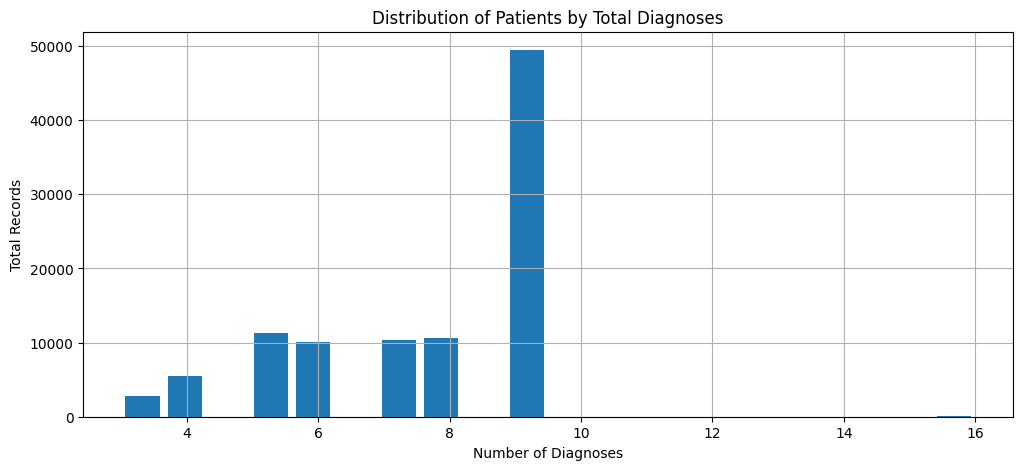

In [121]:
plt.figure(figsize=(12,5))
df_eda[['number_diagnoses']].hist(
    bins=20, 
    ax=plt.gca(),
    rwidth=0.8,
    grid = True,
    sharex = True,
    sharey = True)
plt.title('Distribution of Patients by Total Diagnoses')
plt.xlabel('Number of Diagnoses')
plt.ylabel('Total Records')

plt.show()

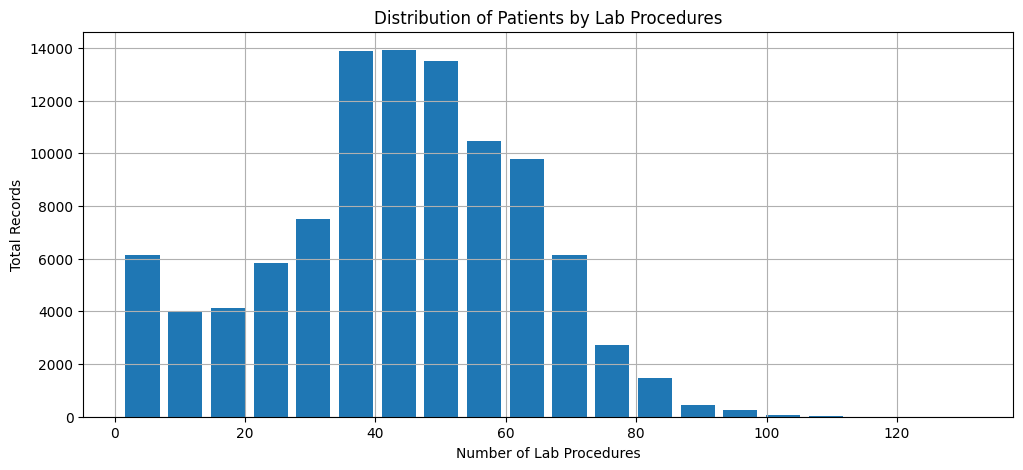

In [283]:
plt.figure(figsize=(12,5))
df_eda[['num_lab_procedures']].hist(
    bins=20, 
    ax=plt.gca(),
    rwidth=0.8,
    grid = True,
    sharex = True,
    sharey = True)
plt.title('Distribution of Patients by Lab Procedures')
plt.xlabel('Number of Lab Procedures')
plt.ylabel('Total Records')

plt.show()

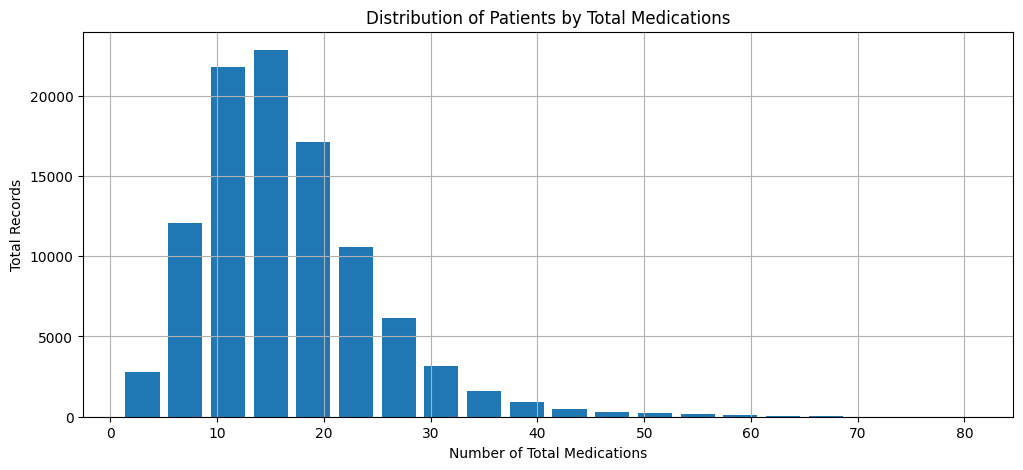

In [284]:
plt.figure(figsize=(12,5))
df_eda[['num_medications']].hist(
    bins=20, 
    ax=plt.gca(),
    rwidth=0.8,
    grid = True,
    sharex = True,
    sharey = True)
plt.title('Distribution of Patients by Total Medications')
plt.xlabel('Number of Total Medications')
plt.ylabel('Total Records')

plt.show()

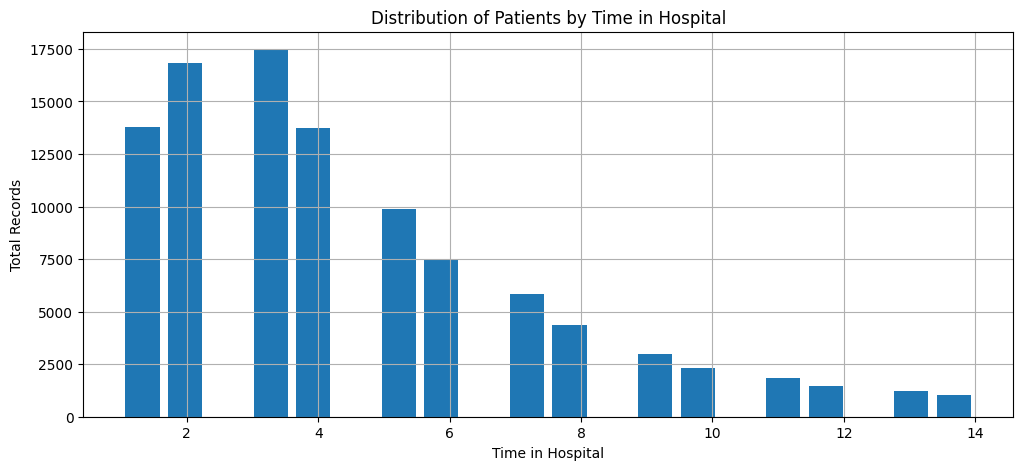

In [285]:
plt.figure(figsize=(12,5))
df_eda[['time_in_hospital']].hist(
    bins=20, 
    ax=plt.gca(),
    rwidth=0.8,
    grid = True,
    sharex = True,
    sharey = True)
plt.title('Distribution of Patients by Time in Hospital')
plt.xlabel('Time in Hospital')
plt.ylabel('Total Records')

plt.show()

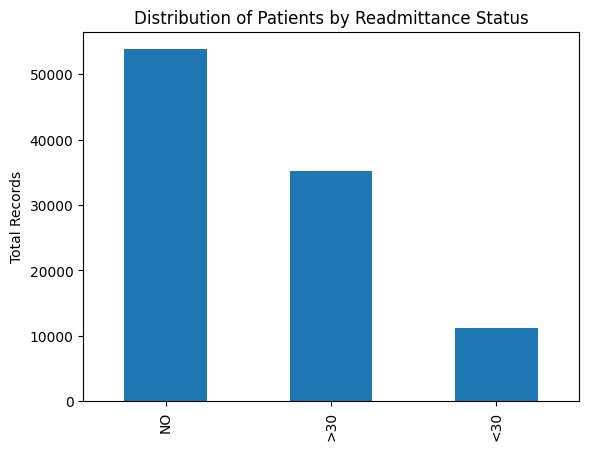

In [151]:
df_eda['readmitted'].value_counts().plot(kind='bar')
plt.title('Distribution of Patients by Readmittance Status')
plt.xlabel('')
plt.ylabel('Total Records')

plt.show()

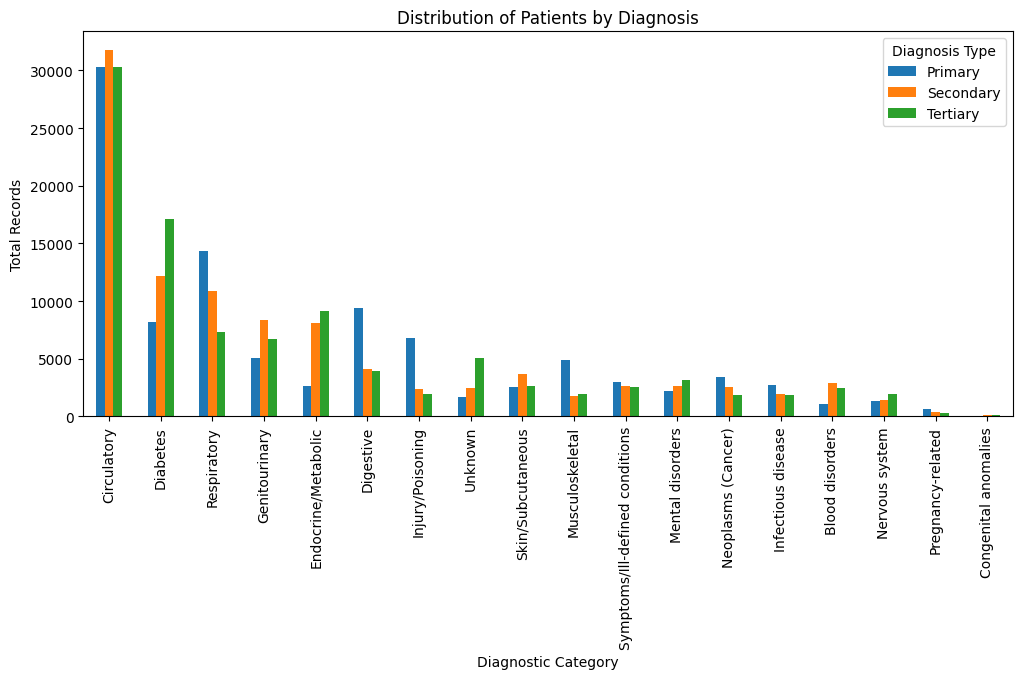

In [172]:
#combine counts
diag_cols = pd.DataFrame({
    'Primary': df_eda['diag_1_cat'].value_counts(),
    'Secondary': df_eda['diag_2_cat'].value_counts(),
    'Tertiary': df_eda['diag_3_cat'].value_counts()
})

#sort by total
diag_cols = diag_cols.loc[diag_cols.sum(axis=1).sort_values(ascending=False).index]

#plot
diag_cols.plot(kind='bar', figsize=(12,5))
plt.title('Distribution of Patients by Diagnosis')
plt.xlabel('Diagnostic Category')
plt.ylabel('Total Records')
plt.legend(title='Diagnosis Type')

plt.show()

The above graphic highlights the most common causes for hospitalization
-

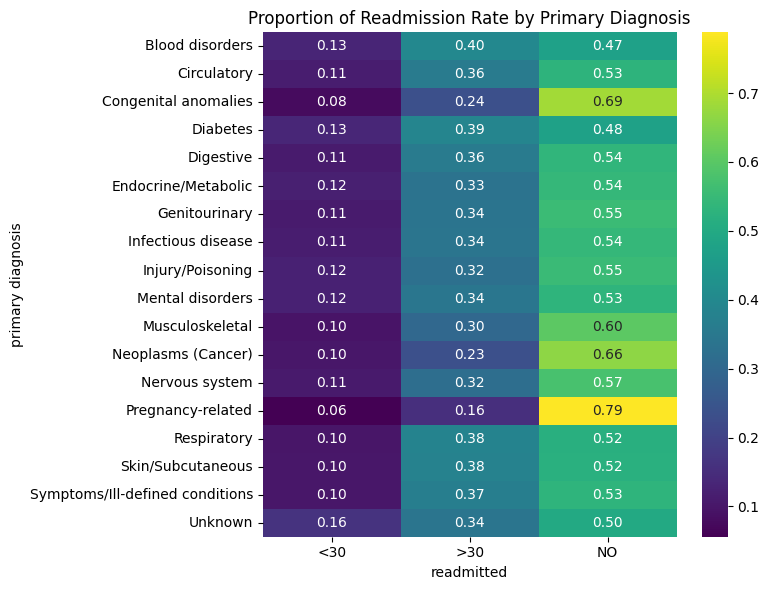

In [177]:
heatmap_data = pd.crosstab(df_eda['diag_1_cat'], df_eda['readmitted'], normalize='index')


plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f")
plt.title('Proportion of Readmission Rate by Primary Diagnosis')
plt.ylabel('primary diagnosis')
plt.tight_layout()

plt.show()

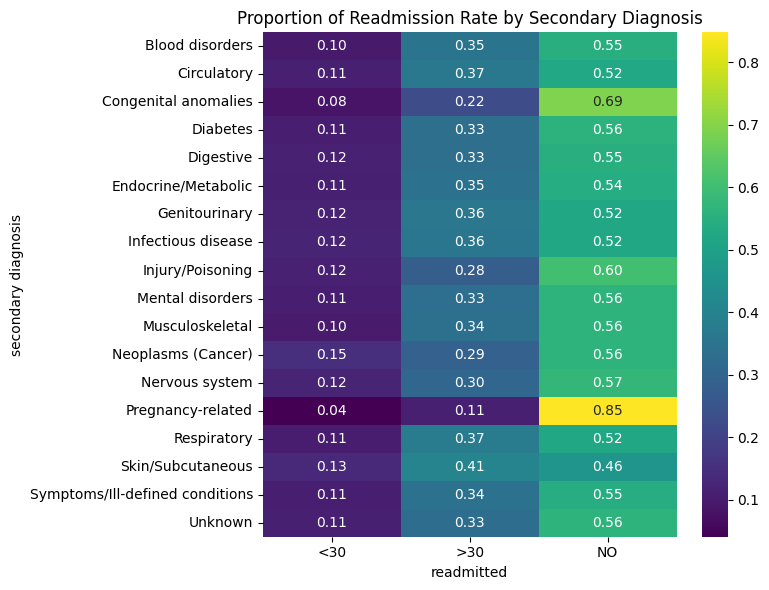

In [178]:
heatmap_data = pd.crosstab(df_eda['diag_2_cat'], df_eda['readmitted'], normalize='index')


plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f")
plt.title('Proportion of Readmission Rate by Secondary Diagnosis')
plt.ylabel('secondary diagnosis')
plt.tight_layout()

plt.show()

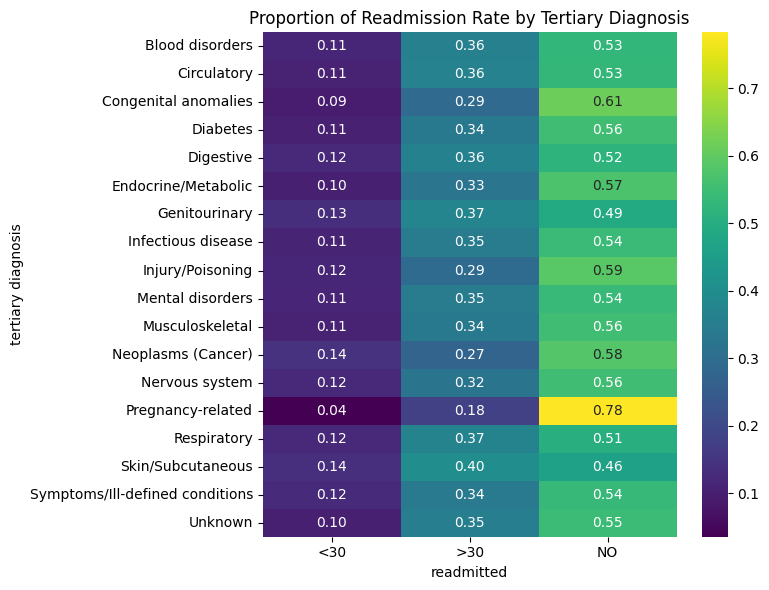

In [179]:
heatmap_data = pd.crosstab(
    df_eda['diag_3_cat'], 
    df_eda['readmitted'], 
    normalize='index'
)


plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f")
plt.title('Proportion of Readmission Rate by Tertiary Diagnosis')
plt.ylabel('tertiary diagnosis')
plt.tight_layout()

plt.show()

The results on which conditions result in readmission at > or < 30 days, or not at all across primary, secondary, and tertiary diagnoses
-

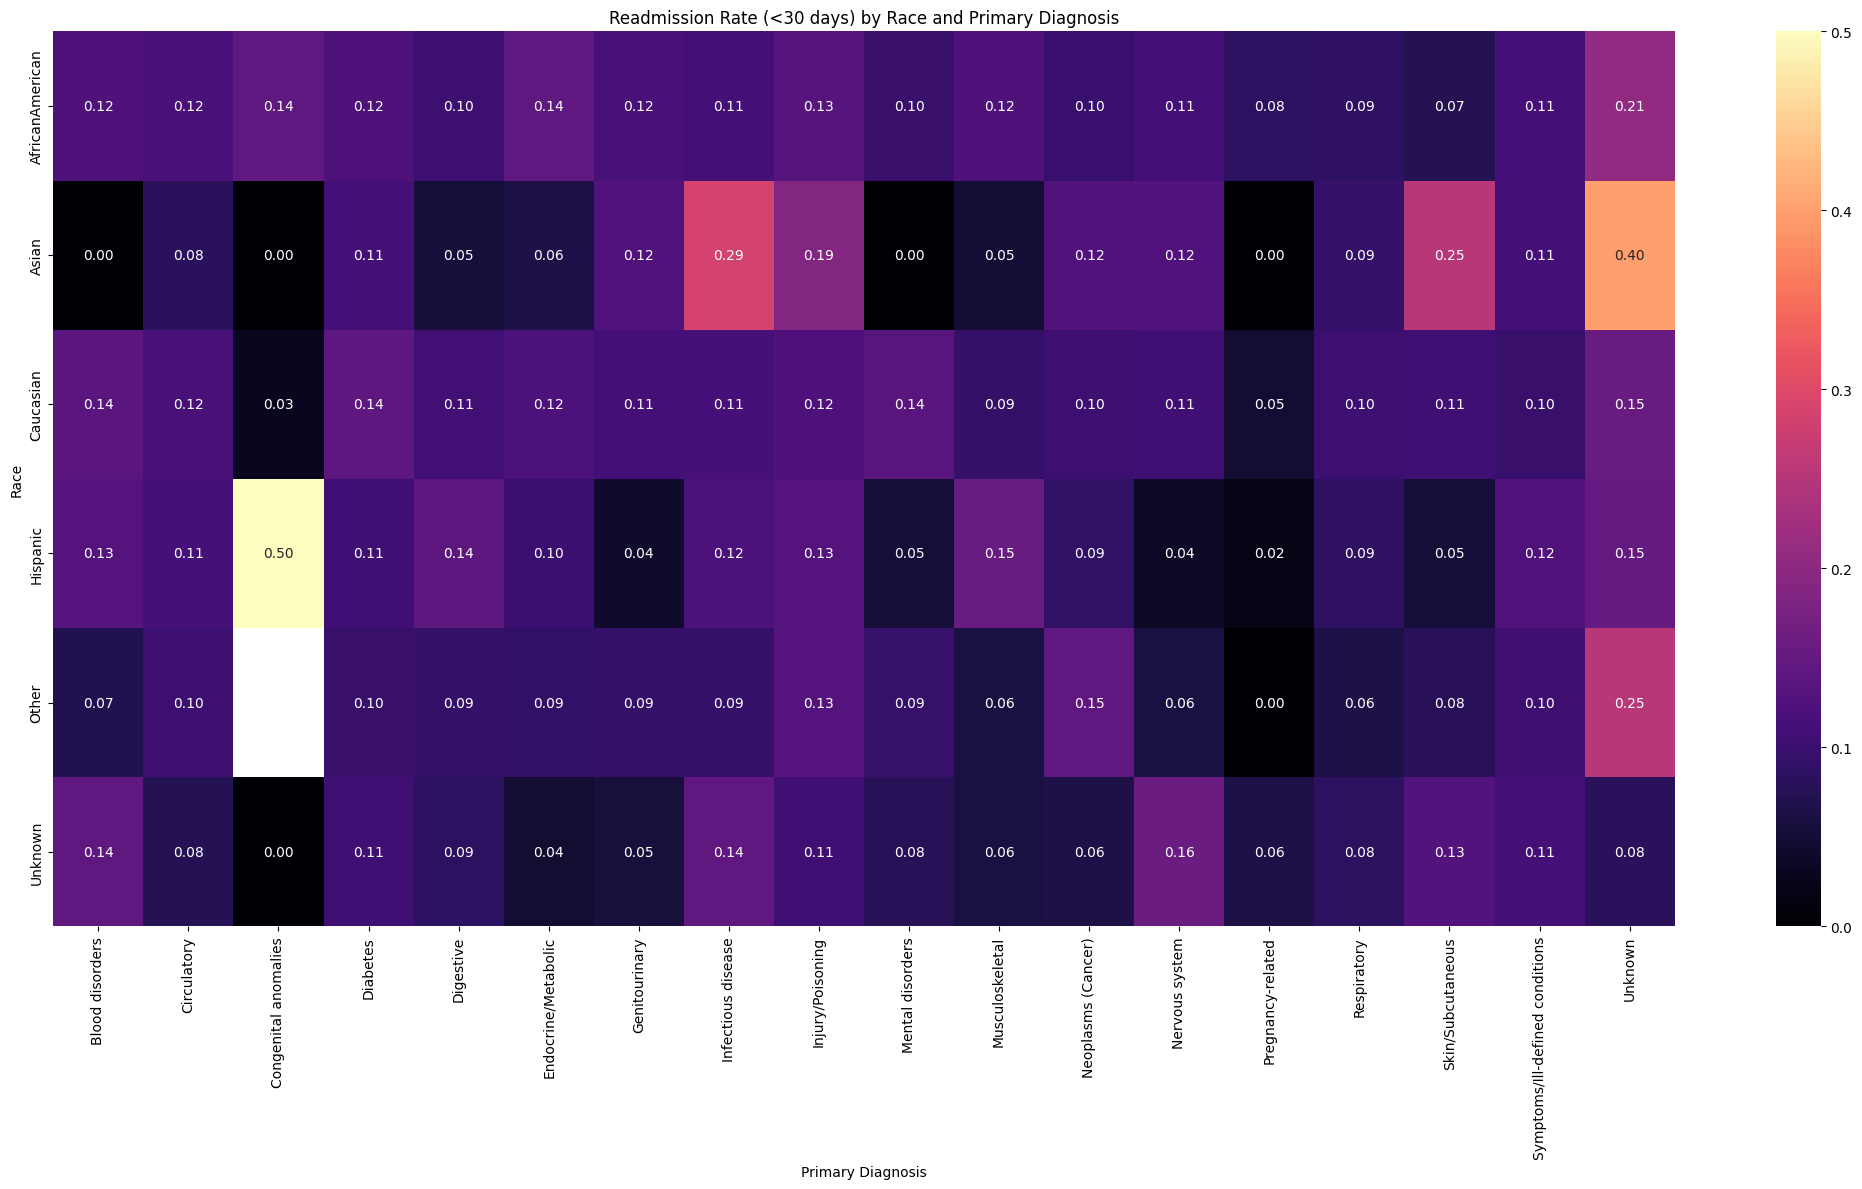

In [183]:
heatmap_data = pd.crosstab(
    df_eda['race'], 
    df_eda['diag_1_cat'], 
    values=(df_eda['readmitted'] == '<30'),
    aggfunc='mean'
)

plt.figure(figsize=(21,12))
sns.heatmap(heatmap_data, annot=True, cmap='magma', fmt=".2f")
plt.title('Readmission Rate (<30 days) by Race and Primary Diagnosis')
plt.xlabel('Primary Diagnosis')
plt.ylabel('Race')
plt.tight_layout()

plt.show()

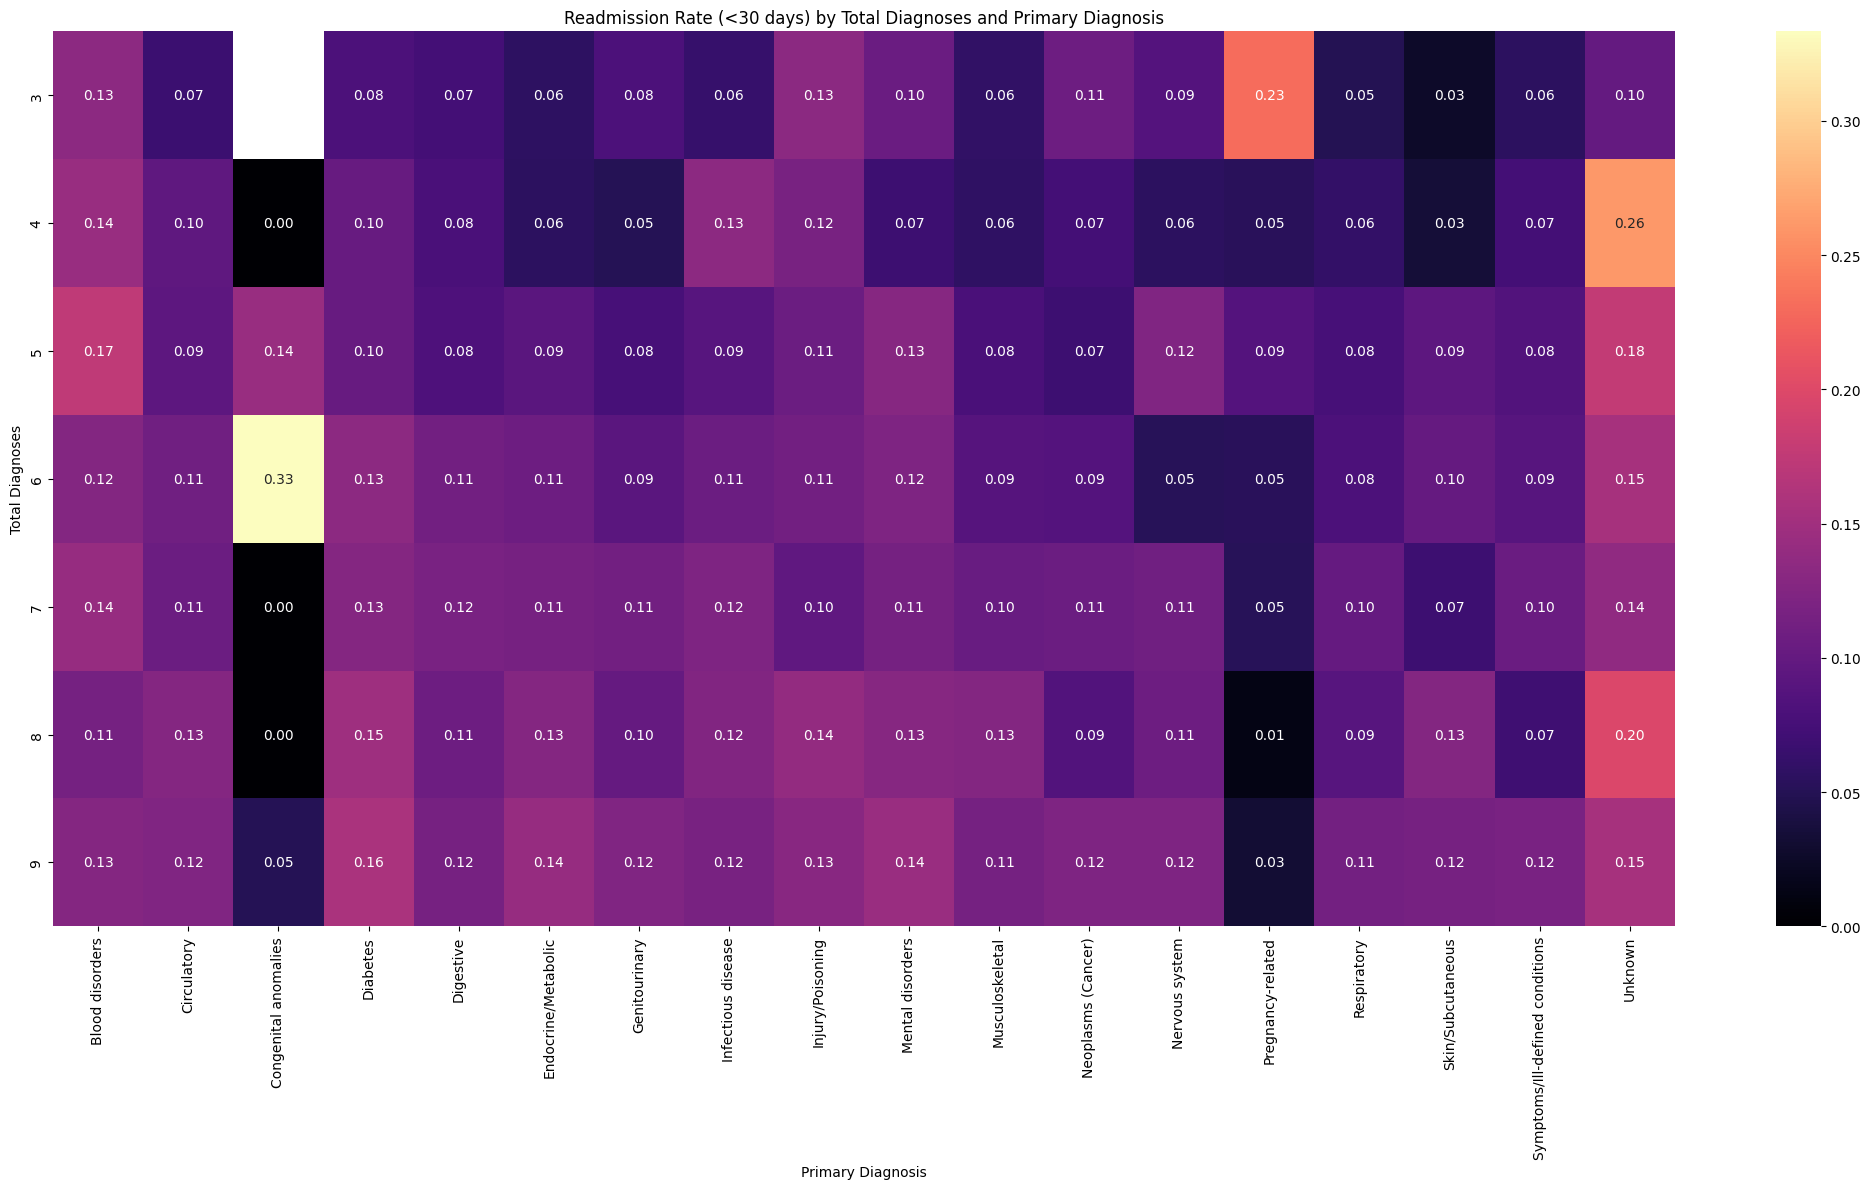

In [254]:
df_eda_filtered = df_eda[df_eda['number_diagnoses'] <= 9]

heatmap_data = pd.crosstab(
    df_eda_filtered['number_diagnoses'], 
    df_eda_filtered['diag_1_cat'], 
    values=(df_eda['readmitted'] == '<30'),
    aggfunc='mean'
)

plt.figure(figsize=(21,12))
sns.heatmap(heatmap_data, annot=True, cmap='magma', fmt=".2f")
plt.title('Readmission Rate (<30 days) by Total Diagnoses and Primary Diagnosis')
plt.xlabel('Primary Diagnosis')
plt.ylabel('Total Diagnoses')
plt.tight_layout()

plt.show()

The data present beyond 9 diagnoses is sparse per earlier visualizations so I chose to limit it to 9 here for the previous visualization. It appears some disease categories do present with a fairly linear increase in readmission risk when additional comorbidities are present. Namely diabetes as it concludes with the strongest readmission risk of 0.16 at 9 total diagnoses. 
-

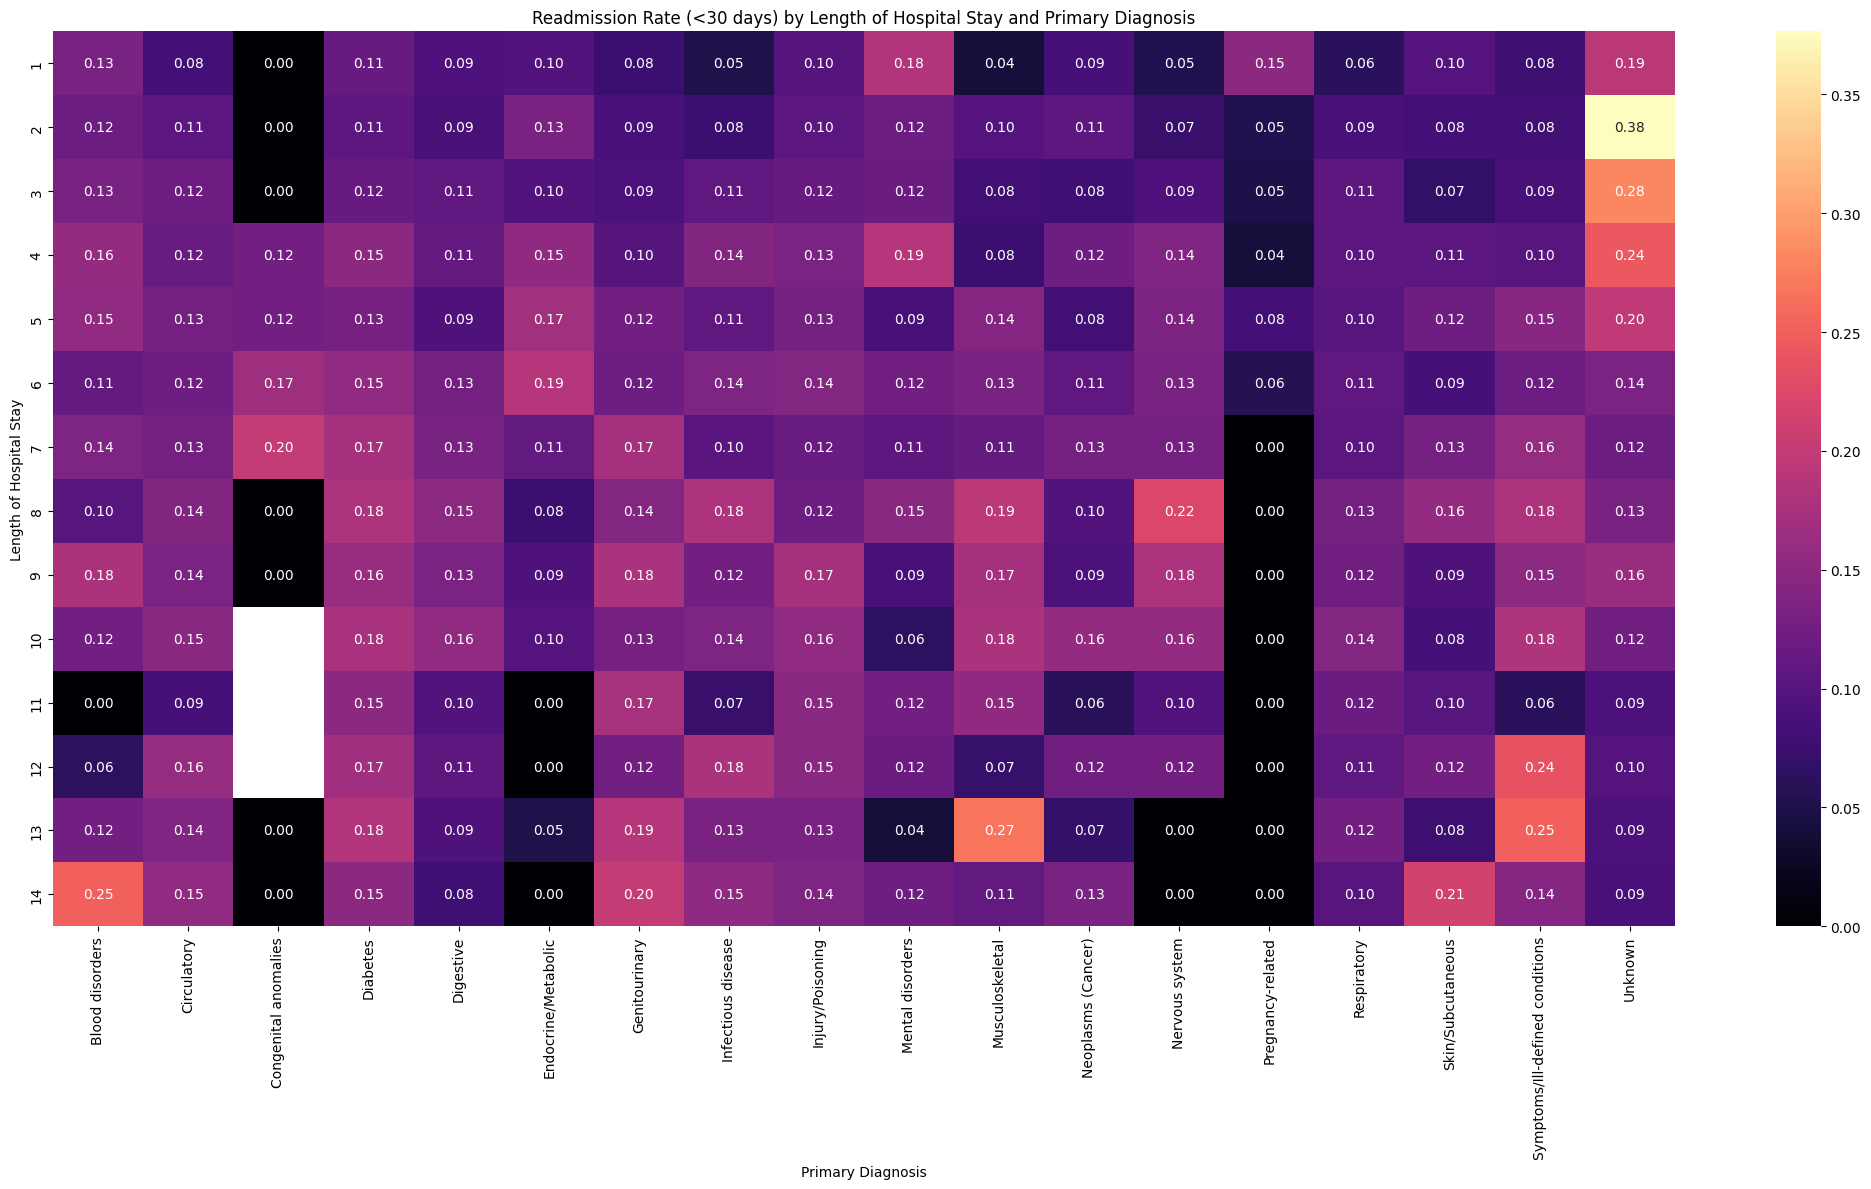

In [188]:
heatmap_data = pd.crosstab(
    df_eda['time_in_hospital'], 
    df_eda['diag_1_cat'], 
    values=(df_eda['readmitted'] == '<30'),
    aggfunc='mean'
)

plt.figure(figsize=(21,12))
sns.heatmap(heatmap_data, annot=True, cmap='magma', fmt=".2f")
plt.title('Readmission Rate (<30 days) by Length of Hospital Stay and Primary Diagnosis')
plt.xlabel('Primary Diagnosis')
plt.ylabel('Length of Hospital Stay')
plt.tight_layout()

plt.show()

This visual shows a clear corellation between length of stay and a reduction of readmission in cases labeled "Unknown". This can also be seen around a mid point in musculoskeletal and metabolic. This could potentially show how minor cases can be dismissed after only a few days, but the more severe a case is, the more important it becomes to extend the hospital stay to guarantee the patient remains stable. Diabetes on the other hand seems to have a fairly even distrobution. This could suggest that the length of stay does not meaningfully increase patient health stability. Other avenues such as patient counseling or post discharge follow-up appointments may be effective routes for this population.
-

In [230]:
#place all 3 columns into one series per patient
all_diags = df_eda[['diag_1_cat','diag_2_cat','diag_3_cat']]

#create binary indicator columns (1 if the patient has the diagnosis, 0 if they do not)
diag_dummies = pd.get_dummies(all_diags, prefix='', prefix_sep='')

#group by patient
diag_present = diag_dummies.groupby(level=0).max()

#collapse duplicate columns with the same name
diag_present = diag_present.T.groupby(level=0).max().T

In [231]:
#create a correlation matrix to check commorbidity strength accross diagnoses
corr_matrix = diag_present.corr()

In [232]:
#create a single Series for use with sort_values later
corr_diabetes = corr_matrix.loc[:, 'Diabetes']

print(type(corr_diabetes))

<class 'pandas.core.series.Series'>


In [233]:
#checking correlation matrix with diabetes to confirm previous code adjudicated correctly
corr_diabetes = corr_matrix['Diabetes'].sort_values(ascending=False)

corr_diabetes

Diabetes                           1.000000
Skin/Subcutaneous                  0.065014
Pregnancy-related                  0.045582
Musculoskeletal                    0.037523
Nervous system                     0.008618
Mental disorders                   0.006188
Endocrine/Metabolic               -0.010263
Congenital anomalies              -0.013385
Digestive                         -0.041314
Unknown                           -0.050122
Symptoms/Ill-defined conditions   -0.062731
Infectious disease                -0.075390
Neoplasms (Cancer)                -0.081214
Blood disorders                   -0.089213
Injury/Poisoning                  -0.096175
Respiratory                       -0.125498
Genitourinary                     -0.132015
Circulatory                       -0.136026
Name: Diabetes, dtype: float64

C:\Users\reape\AppData\Local\Temp\ipykernel_31160\3487154933.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_diabetes.drop('Diabetes').values,


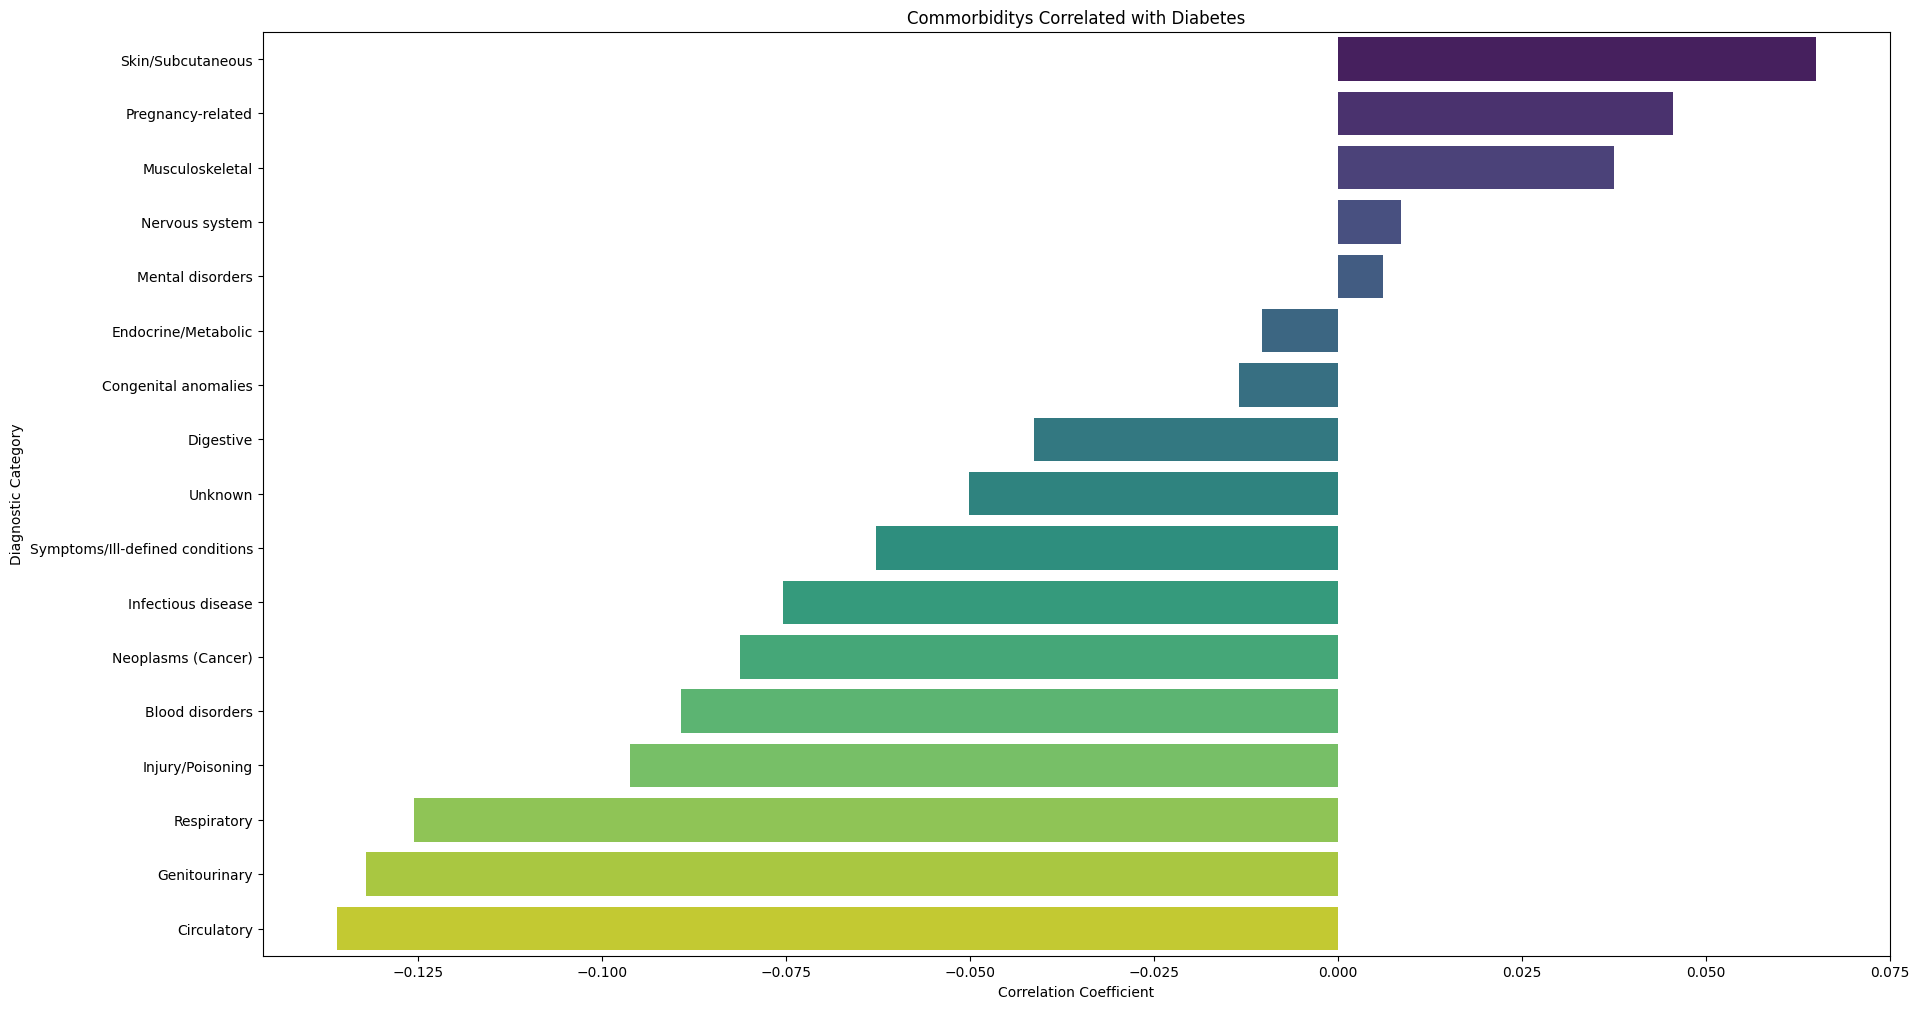

In [234]:
plt.figure(figsize=(21,12))
sns.barplot(x=corr_diabetes.drop('Diabetes').values,
            y=corr_diabetes.drop('Diabetes').index, 
            palette='viridis'
)

plt.title('Commorbiditys Correlated with Diabetes')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Diagnostic Category')

plt.show()

In [235]:
corr_circulatory = corr_matrix.loc[:, 'Circulatory']

corr_circulatory = corr_matrix['Circulatory'].sort_values(ascending=False)

C:\Users\reape\AppData\Local\Temp\ipykernel_31160\1613000780.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_circulatory.drop('Circulatory').values,


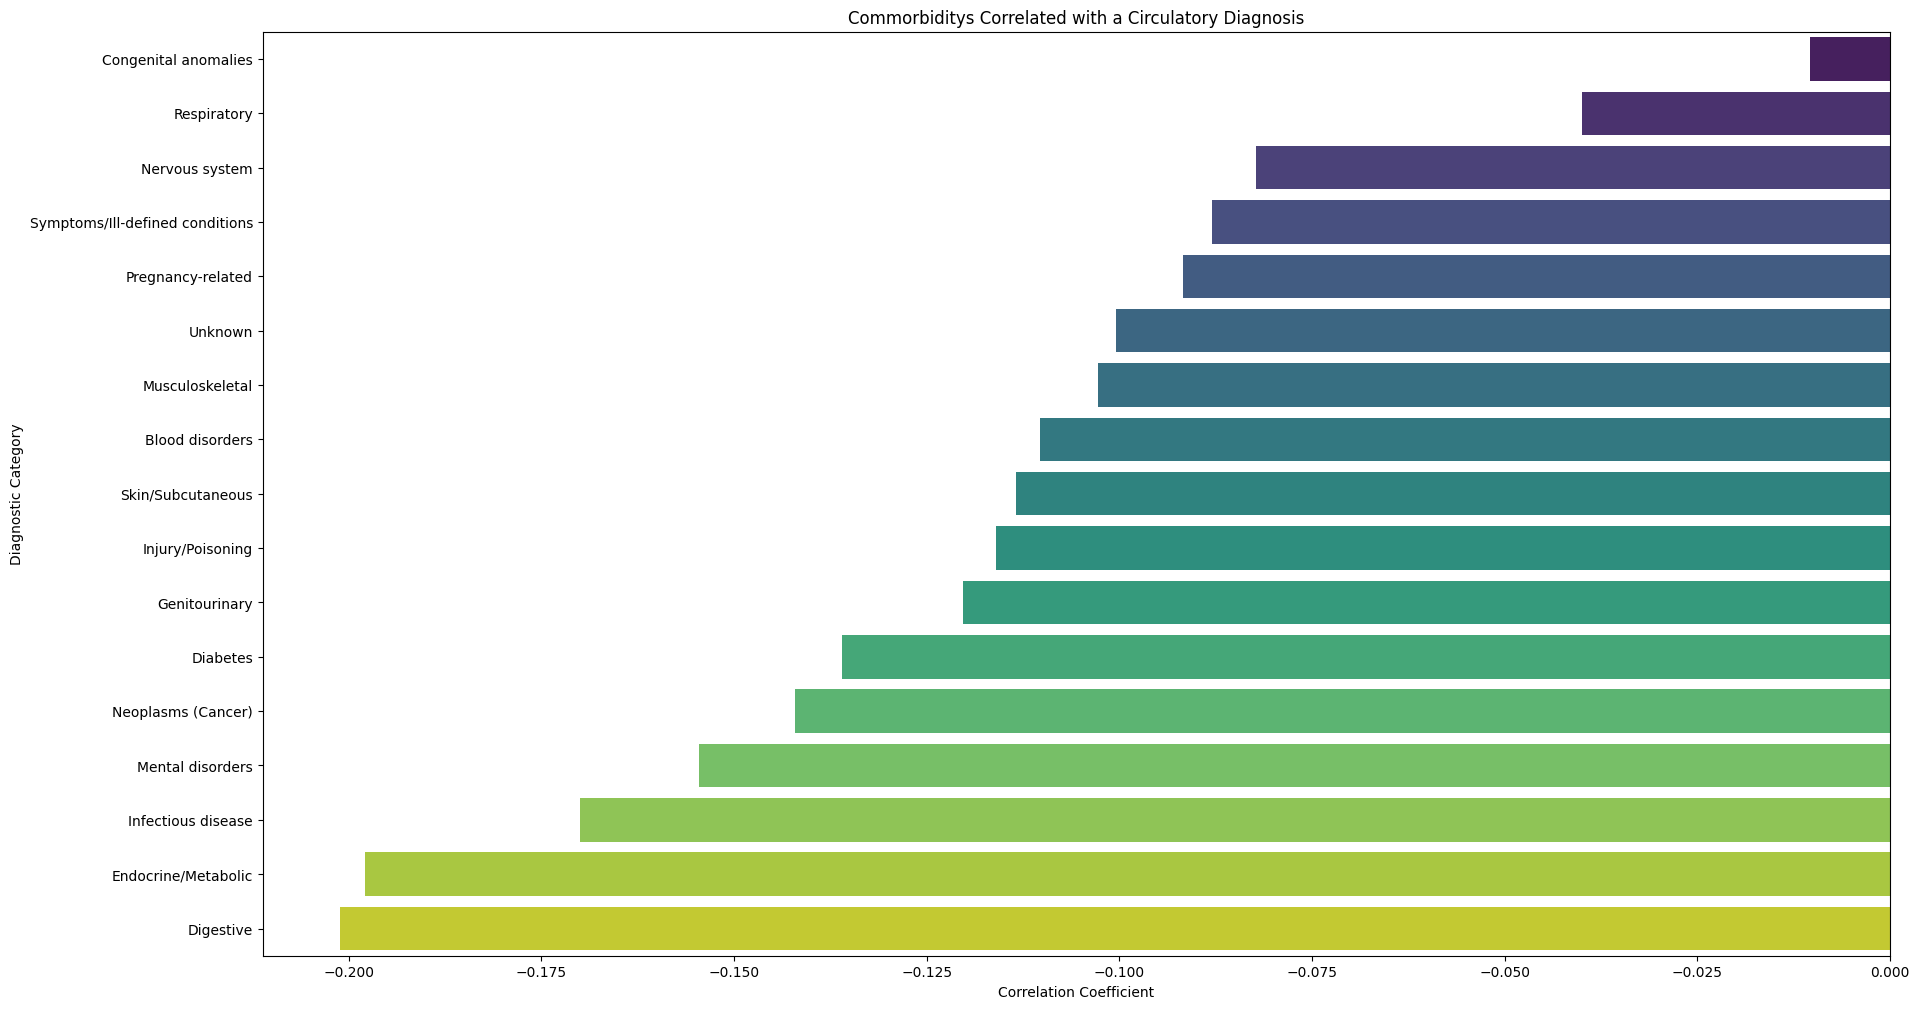

In [236]:
plt.figure(figsize=(21,12))
sns.barplot(x=corr_circulatory.drop('Circulatory').values,
            y=corr_circulatory.drop('Circulatory').index, 
            palette='viridis'
)

plt.title('Commorbiditys Correlated with a Circulatory Diagnosis')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Diagnostic Category')

plt.show()

In [237]:
corr_unknown = corr_matrix.loc[:, 'Unknown']

corr_unknown = corr_matrix['Unknown'].sort_values(ascending=False)

C:\Users\reape\AppData\Local\Temp\ipykernel_31160\2352364776.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_unknown.drop('Unknown').values,


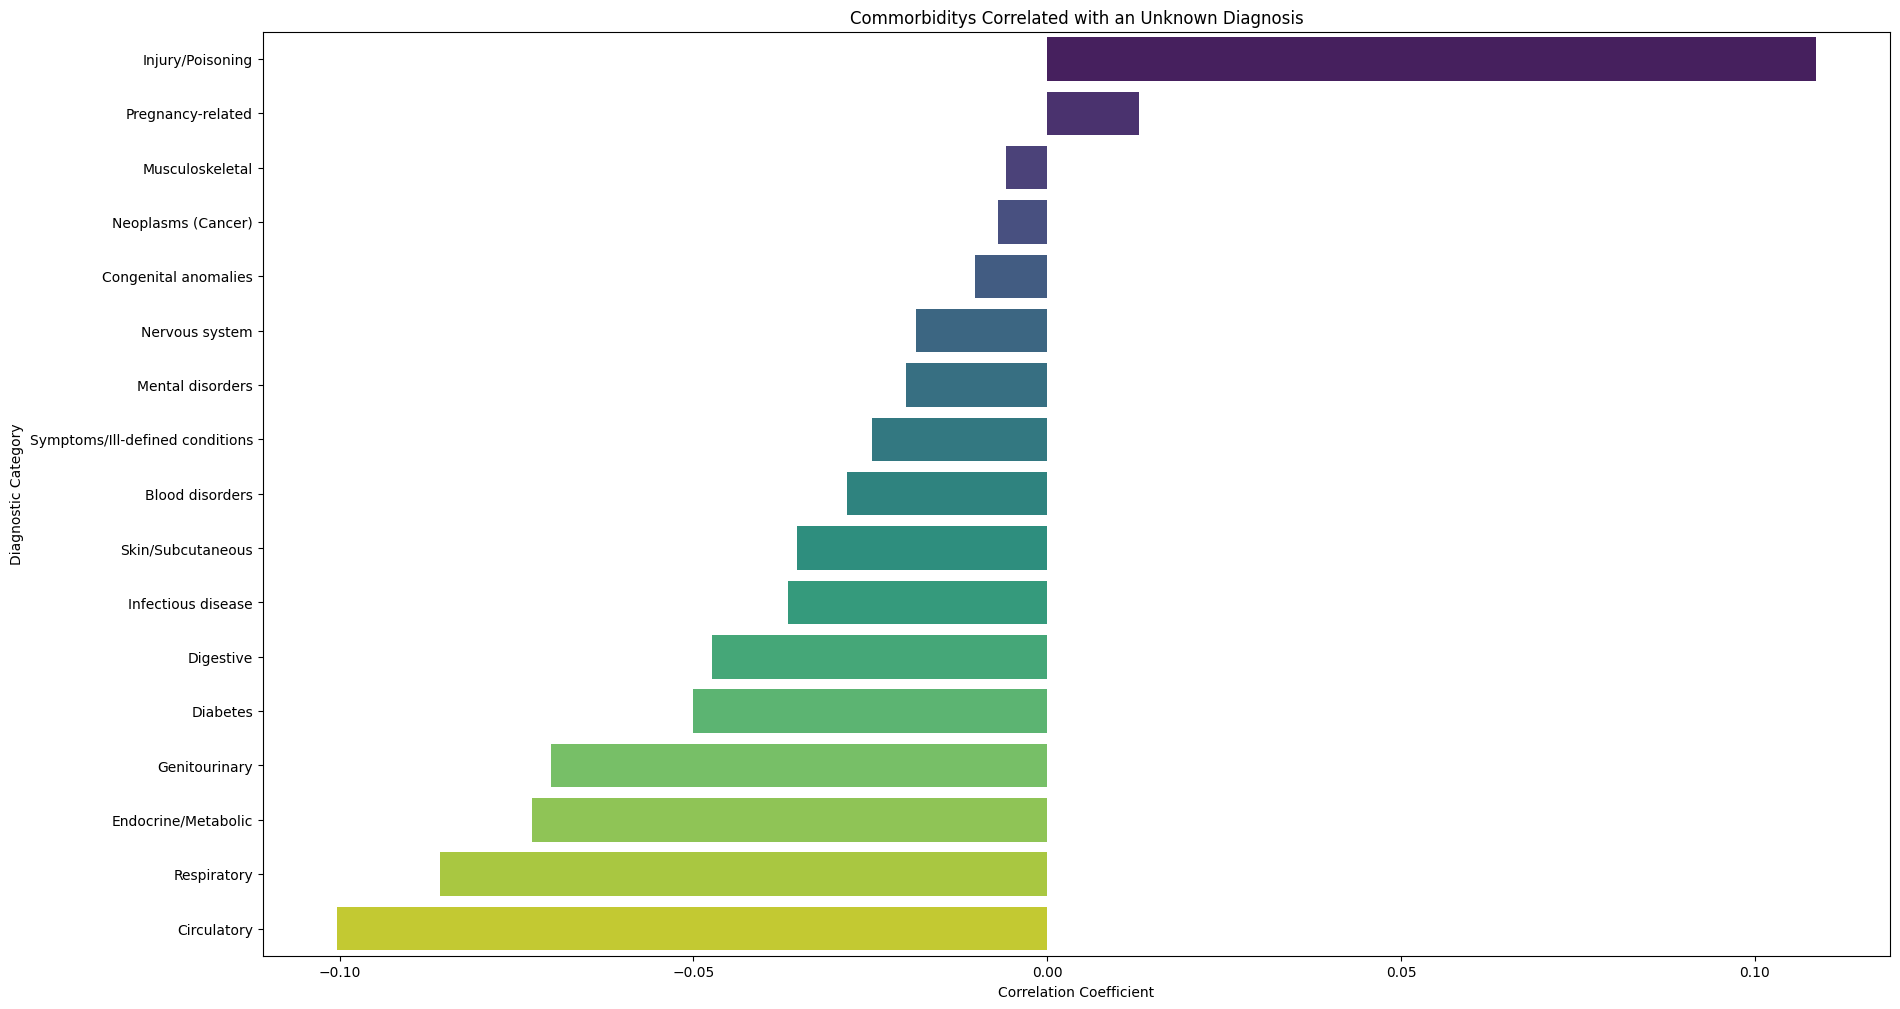

In [238]:
plt.figure(figsize=(21,12))
sns.barplot(x=corr_unknown.drop('Unknown').values,
            y=corr_unknown.drop('Unknown').index, 
            palette='viridis'
)

plt.title('Commorbiditys Correlated with an Unknown Diagnosis')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Diagnostic Category')

plt.show()

After reviewing the correlation between diagnostic category, diagnostic type (primary, secondary, tertiary), and readmittance I noticed the diagnostic type seemed to effect how likely a patient was to be readmitted. For instance if the patient presents with a primary diagnosis of diabetes they are at the highest risk of readmittance. However, if a patient has a tertiary diagnosis related to the skin or subcutaneous tissues they are at an even higher risk of readmission than diabetes.
-
Since I have prior knowledge that diabetes often causes poor wound healing and necrosis I aimed to flatten the diagnostic categories to see if diabetes was perhaps diagnosed alongside skin or subcutaneous tissue diseases more often then other diagnostic categories. After reviewing the above bar charts it appears diabetes does in fact have a weak postive correlation with skin or subcutaneous tissue diseases. Another area of note is that Diabetes has 9 disease categories with a >-0.05 corellation coefficent whereas Circulatory has only 2 disease categories that are associated as closley. This seems to suggest that patients with diabetes are also more likely to present with additional commorbidites compared to other disease categories. 
-

**Preparing Final Cleaned Dataset**
-

In [264]:
#dropping original unparsed raw diagnosis codes
columns_to_drop = ['diag_1','diag_2', 'diag_3']

df_cleaned = df_eda.drop(columns_to_drop, axis=1).copy()

In [265]:
#dropping outliers with more than 9 diagnoses
df_cleaned = df_cleaned[df_cleaned['number_diagnoses'] <= 9]

In [266]:
#confirming drops
df_cleaned.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,change,diabetesMed,readmitted,diag_1_cat,diag_2_cat,diag_3_cat
1,Caucasian,Female,[10-20),3,59,0,18,9,Ch,Yes,>30,Endocrine/Metabolic,Diabetes,Endocrine/Metabolic
2,AfricanAmerican,Female,[20-30),2,11,5,13,6,No,Yes,NO,Pregnancy-related,Diabetes,Unknown
3,Caucasian,Male,[30-40),2,44,1,16,7,Ch,Yes,NO,Infectious disease,Diabetes,Circulatory
4,Caucasian,Male,[40-50),1,51,0,8,5,Ch,Yes,NO,Neoplasms (Cancer),Neoplasms (Cancer),Diabetes
5,Caucasian,Male,[50-60),3,31,6,16,9,No,Yes,>30,Circulatory,Circulatory,Diabetes


In [269]:
#confirming drops
df_cleaned[df_cleaned['number_diagnoses'] > 9]

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,change,diabetesMed,readmitted,diag_1_cat,diag_2_cat,diag_3_cat


In [286]:
#dropping outliers with more than 50 medications
df_cleaned = df_cleaned[df_cleaned['num_medications'] <= 50]

In [288]:
#confirming drops
df_cleaned[df_cleaned['num_medications'] > 50]

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,change,diabetesMed,readmitted,diag_1_cat,diag_2_cat,diag_3_cat


In [289]:
#dropping outliers with more than 100 procedures
df_cleaned = df_cleaned[df_cleaned['num_lab_procedures'] <= 100]

In [292]:
#confirming drops
df_cleaned[df_cleaned['num_lab_procedures'] > 100]

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,change,diabetesMed,readmitted,diag_1_cat,diag_2_cat,diag_3_cat


In [293]:
df_cleaned.to_csv("cleaned_hospital_dataset.csv", index=False)

**Start Encoding for Model**
-

In [328]:
df_encoded = df_cleaned.copy()

In [329]:
df_encoded.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,change,diabetesMed,readmitted,diag_1_cat,diag_2_cat,diag_3_cat
1,Caucasian,Female,[10-20),3,59,0,18,9,Ch,Yes,>30,Endocrine/Metabolic,Diabetes,Endocrine/Metabolic
2,AfricanAmerican,Female,[20-30),2,11,5,13,6,No,Yes,NO,Pregnancy-related,Diabetes,Unknown
3,Caucasian,Male,[30-40),2,44,1,16,7,Ch,Yes,NO,Infectious disease,Diabetes,Circulatory
4,Caucasian,Male,[40-50),1,51,0,8,5,Ch,Yes,NO,Neoplasms (Cancer),Neoplasms (Cancer),Diabetes
5,Caucasian,Male,[50-60),3,31,6,16,9,No,Yes,>30,Circulatory,Circulatory,Diabetes


In [330]:
#dummy encoding race, gender, and diagnoses
df_encoded = pd.get_dummies(df_cleaned, columns=['race','gender','diag_1_cat','diag_2_cat', 'diag_3_cat'], drop_first=True)

In [331]:
df_encoded.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,change,diabetesMed,readmitted,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_Unknown,gender_Male,diag_1_cat_Circulatory,diag_1_cat_Congenital anomalies,diag_1_cat_Diabetes,diag_1_cat_Digestive,diag_1_cat_Endocrine/Metabolic,diag_1_cat_Genitourinary,diag_1_cat_Infectious disease,diag_1_cat_Injury/Poisoning,diag_1_cat_Mental disorders,diag_1_cat_Musculoskeletal,diag_1_cat_Neoplasms (Cancer),diag_1_cat_Nervous system,diag_1_cat_Pregnancy-related,diag_1_cat_Respiratory,diag_1_cat_Skin/Subcutaneous,diag_1_cat_Symptoms/Ill-defined conditions,diag_1_cat_Unknown,diag_2_cat_Circulatory,diag_2_cat_Congenital anomalies,diag_2_cat_Diabetes,diag_2_cat_Digestive,diag_2_cat_Endocrine/Metabolic,diag_2_cat_Genitourinary,diag_2_cat_Infectious disease,diag_2_cat_Injury/Poisoning,diag_2_cat_Mental disorders,diag_2_cat_Musculoskeletal,diag_2_cat_Neoplasms (Cancer),diag_2_cat_Nervous system,diag_2_cat_Pregnancy-related,diag_2_cat_Respiratory,diag_2_cat_Skin/Subcutaneous,diag_2_cat_Symptoms/Ill-defined conditions,diag_2_cat_Unknown,diag_3_cat_Circulatory,diag_3_cat_Congenital anomalies,diag_3_cat_Diabetes,diag_3_cat_Digestive,diag_3_cat_Endocrine/Metabolic,diag_3_cat_Genitourinary,diag_3_cat_Infectious disease,diag_3_cat_Injury/Poisoning,diag_3_cat_Mental disorders,diag_3_cat_Musculoskeletal,diag_3_cat_Neoplasms (Cancer),diag_3_cat_Nervous system,diag_3_cat_Pregnancy-related,diag_3_cat_Respiratory,diag_3_cat_Skin/Subcutaneous,diag_3_cat_Symptoms/Ill-defined conditions,diag_3_cat_Unknown
1,[10-20),3,59,0,18,9,Ch,Yes,>30,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,[20-30),2,11,5,13,6,No,Yes,NO,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,[30-40),2,44,1,16,7,Ch,Yes,NO,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,[40-50),1,51,0,8,5,Ch,Yes,NO,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,[50-60),3,31,6,16,9,No,Yes,>30,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [334]:
#binary encoding, 1 represents readmitted, 0 represents pt was not readmitted
df_encoded['readmitted'] = df_encoded['readmitted'].replace({'>30':1, '<30':1, 'NO':0})

In [335]:
df_encoded.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,change,diabetesMed,readmitted,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_Unknown,gender_Male,diag_1_cat_Circulatory,diag_1_cat_Congenital anomalies,diag_1_cat_Diabetes,diag_1_cat_Digestive,diag_1_cat_Endocrine/Metabolic,diag_1_cat_Genitourinary,diag_1_cat_Infectious disease,diag_1_cat_Injury/Poisoning,diag_1_cat_Mental disorders,diag_1_cat_Musculoskeletal,diag_1_cat_Neoplasms (Cancer),diag_1_cat_Nervous system,diag_1_cat_Pregnancy-related,diag_1_cat_Respiratory,diag_1_cat_Skin/Subcutaneous,diag_1_cat_Symptoms/Ill-defined conditions,diag_1_cat_Unknown,diag_2_cat_Circulatory,diag_2_cat_Congenital anomalies,diag_2_cat_Diabetes,diag_2_cat_Digestive,diag_2_cat_Endocrine/Metabolic,diag_2_cat_Genitourinary,diag_2_cat_Infectious disease,diag_2_cat_Injury/Poisoning,diag_2_cat_Mental disorders,diag_2_cat_Musculoskeletal,diag_2_cat_Neoplasms (Cancer),diag_2_cat_Nervous system,diag_2_cat_Pregnancy-related,diag_2_cat_Respiratory,diag_2_cat_Skin/Subcutaneous,diag_2_cat_Symptoms/Ill-defined conditions,diag_2_cat_Unknown,diag_3_cat_Circulatory,diag_3_cat_Congenital anomalies,diag_3_cat_Diabetes,diag_3_cat_Digestive,diag_3_cat_Endocrine/Metabolic,diag_3_cat_Genitourinary,diag_3_cat_Infectious disease,diag_3_cat_Injury/Poisoning,diag_3_cat_Mental disorders,diag_3_cat_Musculoskeletal,diag_3_cat_Neoplasms (Cancer),diag_3_cat_Nervous system,diag_3_cat_Pregnancy-related,diag_3_cat_Respiratory,diag_3_cat_Skin/Subcutaneous,diag_3_cat_Symptoms/Ill-defined conditions,diag_3_cat_Unknown
1,[10-20),3,59,0,18,9,Ch,Yes,1,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,[20-30),2,11,5,13,6,No,Yes,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,[30-40),2,44,1,16,7,Ch,Yes,0,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,[40-50),1,51,0,8,5,Ch,Yes,0,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,[50-60),3,31,6,16,9,No,Yes,1,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [336]:
df_encoded['age'].unique()

array(['[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)',
       '[70-80)', '[80-90)', '[90-100)', '[0-10)'], dtype=object)

In [337]:
#creating a map for encoding age
age_map = {'[0-10)': 0, '[10-20)': 1, '[20-30)': 2, '[30-40)': 3, '[40-50)': 4, '[50-60)': 5, '[60-70)': 6,
       '[70-80)': 7, '[80-90)': 8, '[90-100)': 9}

#applying age map
df_encoded['age'] = df_encoded['age'].map(age_map)

In [338]:
df_encoded.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,change,diabetesMed,readmitted,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_Unknown,gender_Male,diag_1_cat_Circulatory,diag_1_cat_Congenital anomalies,diag_1_cat_Diabetes,diag_1_cat_Digestive,diag_1_cat_Endocrine/Metabolic,diag_1_cat_Genitourinary,diag_1_cat_Infectious disease,diag_1_cat_Injury/Poisoning,diag_1_cat_Mental disorders,diag_1_cat_Musculoskeletal,diag_1_cat_Neoplasms (Cancer),diag_1_cat_Nervous system,diag_1_cat_Pregnancy-related,diag_1_cat_Respiratory,diag_1_cat_Skin/Subcutaneous,diag_1_cat_Symptoms/Ill-defined conditions,diag_1_cat_Unknown,diag_2_cat_Circulatory,diag_2_cat_Congenital anomalies,diag_2_cat_Diabetes,diag_2_cat_Digestive,diag_2_cat_Endocrine/Metabolic,diag_2_cat_Genitourinary,diag_2_cat_Infectious disease,diag_2_cat_Injury/Poisoning,diag_2_cat_Mental disorders,diag_2_cat_Musculoskeletal,diag_2_cat_Neoplasms (Cancer),diag_2_cat_Nervous system,diag_2_cat_Pregnancy-related,diag_2_cat_Respiratory,diag_2_cat_Skin/Subcutaneous,diag_2_cat_Symptoms/Ill-defined conditions,diag_2_cat_Unknown,diag_3_cat_Circulatory,diag_3_cat_Congenital anomalies,diag_3_cat_Diabetes,diag_3_cat_Digestive,diag_3_cat_Endocrine/Metabolic,diag_3_cat_Genitourinary,diag_3_cat_Infectious disease,diag_3_cat_Injury/Poisoning,diag_3_cat_Mental disorders,diag_3_cat_Musculoskeletal,diag_3_cat_Neoplasms (Cancer),diag_3_cat_Nervous system,diag_3_cat_Pregnancy-related,diag_3_cat_Respiratory,diag_3_cat_Skin/Subcutaneous,diag_3_cat_Symptoms/Ill-defined conditions,diag_3_cat_Unknown
1,1,3,59,0,18,9,Ch,Yes,1,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,2,2,11,5,13,6,No,Yes,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,3,2,44,1,16,7,Ch,Yes,0,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,4,1,51,0,8,5,Ch,Yes,0,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,5,3,31,6,16,9,No,Yes,1,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [340]:
#binary encoding for change and diabetesMed
df_encoded['diabetesMed'] = df_encoded['diabetesMed'].replace({'Yes':1, 'No':0})
df_encoded['change'] = df_encoded['change'].replace({'Ch':1, 'No':0})

In [341]:
df_encoded.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,change,diabetesMed,readmitted,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_Unknown,gender_Male,diag_1_cat_Circulatory,diag_1_cat_Congenital anomalies,diag_1_cat_Diabetes,diag_1_cat_Digestive,diag_1_cat_Endocrine/Metabolic,diag_1_cat_Genitourinary,diag_1_cat_Infectious disease,diag_1_cat_Injury/Poisoning,diag_1_cat_Mental disorders,diag_1_cat_Musculoskeletal,diag_1_cat_Neoplasms (Cancer),diag_1_cat_Nervous system,diag_1_cat_Pregnancy-related,diag_1_cat_Respiratory,diag_1_cat_Skin/Subcutaneous,diag_1_cat_Symptoms/Ill-defined conditions,diag_1_cat_Unknown,diag_2_cat_Circulatory,diag_2_cat_Congenital anomalies,diag_2_cat_Diabetes,diag_2_cat_Digestive,diag_2_cat_Endocrine/Metabolic,diag_2_cat_Genitourinary,diag_2_cat_Infectious disease,diag_2_cat_Injury/Poisoning,diag_2_cat_Mental disorders,diag_2_cat_Musculoskeletal,diag_2_cat_Neoplasms (Cancer),diag_2_cat_Nervous system,diag_2_cat_Pregnancy-related,diag_2_cat_Respiratory,diag_2_cat_Skin/Subcutaneous,diag_2_cat_Symptoms/Ill-defined conditions,diag_2_cat_Unknown,diag_3_cat_Circulatory,diag_3_cat_Congenital anomalies,diag_3_cat_Diabetes,diag_3_cat_Digestive,diag_3_cat_Endocrine/Metabolic,diag_3_cat_Genitourinary,diag_3_cat_Infectious disease,diag_3_cat_Injury/Poisoning,diag_3_cat_Mental disorders,diag_3_cat_Musculoskeletal,diag_3_cat_Neoplasms (Cancer),diag_3_cat_Nervous system,diag_3_cat_Pregnancy-related,diag_3_cat_Respiratory,diag_3_cat_Skin/Subcutaneous,diag_3_cat_Symptoms/Ill-defined conditions,diag_3_cat_Unknown
1,1,3,59,0,18,9,1,1,1,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,2,2,11,5,13,6,0,1,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,3,2,44,1,16,7,1,1,0,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,4,1,51,0,8,5,1,1,0,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,5,3,31,6,16,9,0,1,1,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [342]:
df_encoded.to_csv('cleaned_encoded_hospital_data.csv', index=False)

**Start Modeling**
-

In [343]:
#splitting the dataset
X = df_encoded.drop('readmitted', axis=1)
y = df_encoded['readmitted']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [348]:
#creating a majority class predictor model that always guesses the answer that is most likely
major_class = DummyClassifier(strategy='most_frequent')
major_class.fit(X_train,y_train)
y_pred_major_class = major_class.predict(X_test)

print(classification_report(y_test, y_pred_major_class))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70     10686
           1       0.00      0.00      0.00      9242

    accuracy                           0.54     19928
   macro avg       0.27      0.50      0.35     19928
weighted avg       0.29      0.54      0.37     19928



C:\Users\reape\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\reape\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\reape\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [382]:
print(roc_auc_score(y_test, y_pred_major_class))

0.5


In [364]:
#a dict of random forest params to test
param_grid = {
    'n_estimators': [100, 300, 500, 1000],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', 'balanced_subsample']
}

In [ ]:
#testing the best random forest params
rf = RandomForestClassifier(random_state=42)
search = RandomizedSearchCV(
    rf, param_grid, n_iter=25,
    scoring = 'roc_auc', cv=3,
    n_jobs=-1, random_state=42
)

search.fit(X_train, y_train)

top_rf = search.best_params_

In [372]:
#printint the top results to the console
print(top_rf)

{'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 20, 'class_weight': 'balanced'}


In [375]:
#building the optimized random forest
optimized_rf = RandomForestClassifier(
    **top_rf,
    random_state=42,
    n_jobs=-1
)

optimized_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       max_features='log2', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [376]:
y_pred_optimized_rf = optimized_rf.predict(X_test)

print(classification_report(y_test, y_pred_optimized_rf))

              precision    recall  f1-score   support

           0       0.63      0.54      0.58     10686
           1       0.54      0.63      0.58      9242

    accuracy                           0.58     19928
   macro avg       0.58      0.58      0.58     19928
weighted avg       0.59      0.58      0.58     19928



In [377]:
print(roc_auc_score(y_test, optimized_rf.predict_proba(X_test)[:, 1]))

0.6182601820664015


In [361]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [362]:
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.59      0.68      0.63     10686
           1       0.54      0.45      0.49      9242

    accuracy                           0.57     19928
   macro avg       0.57      0.56      0.56     19928
weighted avg       0.57      0.57      0.56     19928



In [380]:
print(roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]))

0.5969306585341443


After comparing my paramater optimized Random Forest Classifier model against Majority Classifier and Logistic Regression models it's performance has a statistically signifigant lead especially in class-1 Recall and class-1 F1 score while being almost identical in accuracy and precision. This means the Random Forest model catches far mor actual readmissions and has a better balance of precision and recall which is important for real world use. Additionally, the Random Forest model presents with a slight lead in ROC-AUC testing scoring a 0.618, whereas a Majority Classifier always has 0.5, and the Logistic Regression scored 0.597.
-

In [383]:
#pulling feature importances from model
feature_importance = optimized_rf.feature_importances_

In [384]:
#creating dataframe with importances
df_feats = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

C:\Users\reape\AppData\Local\Temp\ipykernel_31160\444892325.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


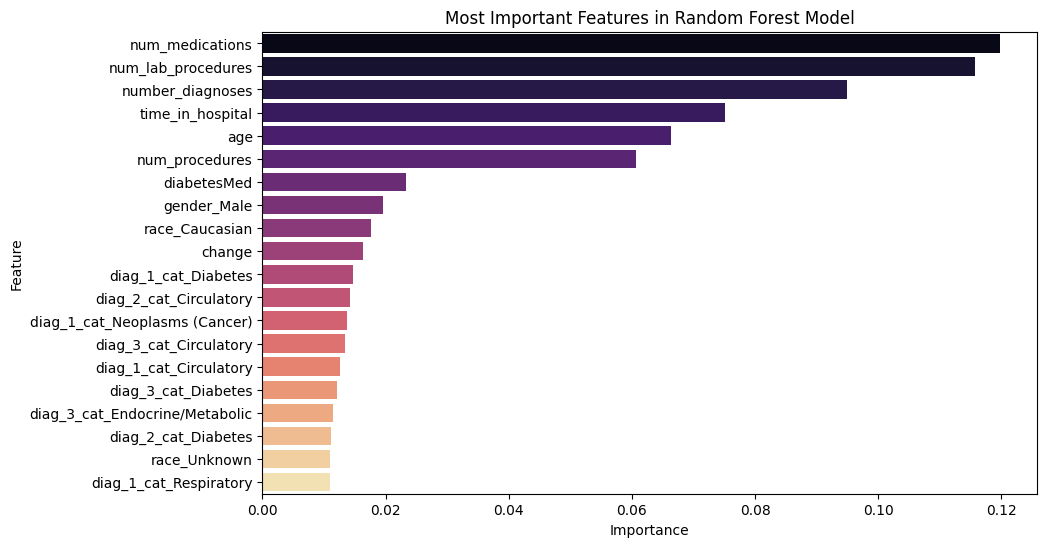

In [386]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=df_feats.head(20),
    x='Importance',
    y='Feature',
    palette='magma'
)
plt.title('Most Important Features in Random Forest Model')

plt.show()

In [388]:
#save the model
joblib.dump(optimized_rf, 'random_forest_readmission_model.pkl')

['random_forest_readmission_model.pkl']

In [12]:
import os
model_path = os.
rf_loaded = joblib.load('model/random_forest_readmission_model.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'model/random_forest_readmission_model.pkl'